In [45]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Studying & Cleaning dataset


In [46]:
# Read the CSV file
hospital_dataframe = pd.read_csv("large_hospital.csv")

# Check the size of the data
print("Data dimensions:")
print(hospital_dataframe.shape)
print()




Data dimensions:
(30712, 11)



In [47]:
hospital_dataframe.head()


,mrn,sex,dob,admitQTR,admitYR,readmit,floor,payment,dx,hospital_room,HAI
0,1206114360123C,F,8/30/33,3,2012,0,5,1670,460,north,Acquired
1,2301206660123A,M,8/30/92,2,2013,0,10,2390,461,north,Not Acquired
2,3187104360123F,F,8/30/92,4,2014,0,4,1670,462,north,Acquired
3,4205151560123C,F,8/30/92,4,2015,0,6,1650,463,north,Acquired
4,5338897560123C,F,8/30/92,4,2016,0,6,1640,464,north,Not Acquired


# Beginning data Cleaning

In [48]:

print("Number of duplicate rows:")
print(hospital_dataframe.duplicated().sum())
print()

# Removing potential duplicates
hospital_dataframe = hospital_dataframe.drop_duplicates()
print("Data after removing duplicates:")
print(hospital_dataframe.shape)



Number of duplicate rows:
0

Data after removing duplicates:
(30712, 11)


In [49]:
#Converting date of birth and removing confidential cells which had dates moved to the future
hospital_dataframe['dob'] = pd.to_datetime(hospital_dataframe['dob'])
current_date = pd.Timestamp.now()

# Remove records with invalid dates of birth
invalid_dob = hospital_dataframe['dob'] > current_date
hospital_dataframe = hospital_dataframe[~invalid_dob]

invalid_admit = hospital_dataframe['dob'].dt.year > hospital_dataframe['admitYR']
hospital_dataframe = hospital_dataframe[~invalid_admit]

print("Data after removing invalid date of birth records:")
print(hospital_dataframe.shape)
print()

Data after removing invalid date of birth records:
(20655, 11)



#  Descriptive Stats



In [50]:
# Run descriptive statistics on the entire dataset
print("Descriptive Statistics for Numerical Variables:")
print(hospital_dataframe.describe())
print()

# Additional statistics for categorical variables
print("\nCategorical Variable Summaries:")
print("\nSex distribution:")
print(hospital_dataframe['sex'].value_counts())
print("\nHospital room distribution:")
print(hospital_dataframe['hospital_room'].value_counts())
print("\nHAI distribution:")
print(hospital_dataframe['HAI'].value_counts())

Descriptive Statistics for Numerical Variables:
                                 dob      admitQTR       admitYR  \
count                          20655  20655.000000  20655.000000   
mean   1991-08-21 16:51:43.790849664      2.488647   2012.614234   
min              1976-08-30 00:00:00      1.000000   2002.000000   
25%              1979-08-30 00:00:00      2.000000   2010.000000   
50%              1987-08-30 00:00:00      2.000000   2014.000000   
75%              2005-08-30 00:00:00      3.000000   2017.000000   
max              2019-08-30 00:00:00      4.000000   2019.000000   
std                              NaN      1.099510      5.221195   

            readmit         floor       payment            dx  
count  20655.000000  20655.000000  20655.000000  20655.000000  
mean       0.351634      6.365771   2821.123796    375.161172  
min        0.000000      1.000000     10.000000    210.000000  
25%        0.000000      4.000000   1430.000000    216.000000  
50%        0.000000

# One-Hot Encode HAI Column


In [59]:
# One-hot encode the HAI column
# The dtype=int parameter converts True/False to 1/0
hai_encoded = pd.get_dummies(hospital_dataframe['HAI'], prefix='HAI', dtype=int)

print("One-hot encoded HAI columns:")
print(hai_encoded.head(10))
print()

# Concatenate with original dataframe
# axis=1 means concatenate columns (side by side)
hospital_dataframe = pd.concat([hospital_dataframe, hai_encoded], axis=1)

print("Updated dataframe with one-hot encoded columns:")
hospital_dataframe.head()


One-hot encoded HAI columns:
    HAI_Acquired  HAI_Not Acquired
1              0                 1
2              1                 0
3              1                 0
4              0                 1
5              0                 1
6              1                 0
9              0                 1
11             1                 0
12             0                 1
13             0                 1

Updated dataframe with one-hot encoded columns:


,mrn,sex,dob,admitQTR,admitYR,readmit,floor,payment,dx,hospital_room,HAI,HAI_Acquired,HAI_Not Acquired,HAI_Acquired,HAI_Not Acquired
1,2301206660123A,M,1992-08-30,2,2013,0,10,2390,461,north,Not Acquired,0,1,0,1
2,3187104360123F,F,1992-08-30,4,2014,0,4,1670,462,north,Acquired,1,0,1,0
3,4205151560123C,F,1992-08-30,4,2015,0,6,1650,463,north,Acquired,1,0,1,0
4,5338897560123C,F,1992-08-30,4,2016,0,6,1640,464,north,Not Acquired,0,1,0,1
5,6193502960123C,F,1992-08-30,1,2017,0,6,1670,465,north,Not Acquired,0,1,0,1


# Aggregating the HAI column


In [52]:
# summing the amount of HAI's acquired during a specific year
acquired_by_year = hospital_dataframe.groupby('admitYR')['HAI_Acquired'].sum()

print("Acquired HAIs by Admit Year:")
print(acquired_by_year)

print("Total Acquired HAIs across all years:", acquired_by_year.sum())

Acquired HAIs by Admit Year:
admitYR
2002      10
2003    1310
2004       4
2005       1
2006       6
2007      47
2008      54
2009      54
2010     648
2011     643
2012     687
2013     662
2014     651
2015     596
2016     662
2017     769
2018     759
2019     811
Name: HAI_Acquired, dtype: int64
Total Acquired HAIs across all years: 8374


In [53]:
# Sum Not Acquired HAIs by admit year
not_acquired_by_year = hospital_dataframe.groupby('admitYR')['HAI_Not Acquired'].sum()

print("Not Acquired HAIs by Admit Year:")
print(not_acquired_by_year)
print()
print("Total Not Acquired HAIs across all years:", not_acquired_by_year.sum())

# Optional: Combined view of both
print("\nCombined View - HAI Status by Year:")
hai_by_year = pd.DataFrame({
    'Acquired': acquired_by_year,
    'Not Acquired': not_acquired_by_year
})
print(hai_by_year)

Not Acquired HAIs by Admit Year:
admitYR
2002      13
2003    2258
2004       2
2005       6
2006       2
2007      78
2008      74
2009      80
2010     797
2011     882
2012     880
2013     884
2014     899
2015     951
2016     908
2017    1132
2018    1220
2019    1215
Name: HAI_Not Acquired, dtype: int64

Total Not Acquired HAIs across all years: 12281

Combined View - HAI Status by Year:
         Acquired  Not Acquired
admitYR                        
2002           10            13
2003         1310          2258
2004            4             2
2005            1             6
2006            6             2
2007           47            78
2008           54            74
2009           54            80
2010          648           797
2011          643           882
2012          687           880
2013          662           884
2014          651           899
2015          596           951
2016          662           908
2017          769          1132
2018          759         

# Descriptive categorical data: Total Payments by Hospital Room



In [54]:

payments_by_room = hospital_dataframe.groupby('hospital_room')['payment'].sum()

print("Total Payments by Hospital Room:")
print(payments_by_room)
print()

# Sort by payment amount (descending)
print("Total Payments by Hospital Room (sorted):")
print(payments_by_room.sort_values(ascending=False))

Total Payments by Hospital Room:
hospital_room
buckland      9280113
diagon        1985735
east         10314467
forbes        1140573
north          765769
privet        5154833
south        10981847
west         13954831
westmarch     4692144
Name: payment, dtype: int64

Total Payments by Hospital Room (sorted):
hospital_room
west         13954831
south        10981847
east         10314467
buckland      9280113
privet        5154833
westmarch     4692144
diagon        1985735
forbes        1140573
north          765769
Name: payment, dtype: int64


In [55]:

payments_by_year = hospital_dataframe.groupby('admitYR')['payment'].sum()

print("Total Payments by Year:")
print(payments_by_year)
print()
print("Grand Total Payments:", payments_by_year.sum())

Total Payments by Year:
admitYR
2002      65997
2003    9825056
2004      15812
2005      22433
2006      28652
2007     328167
2008     355286
2009     379894
2010    4124248
2011    4360708
2012    4484286
2013    4460475
2014    4376932
2015    4370646
2016    4395080
2017    5220969
2018    5697368
2019    5758303
Name: payment, dtype: int64

Grand Total Payments: 58270312


# Data visualizations



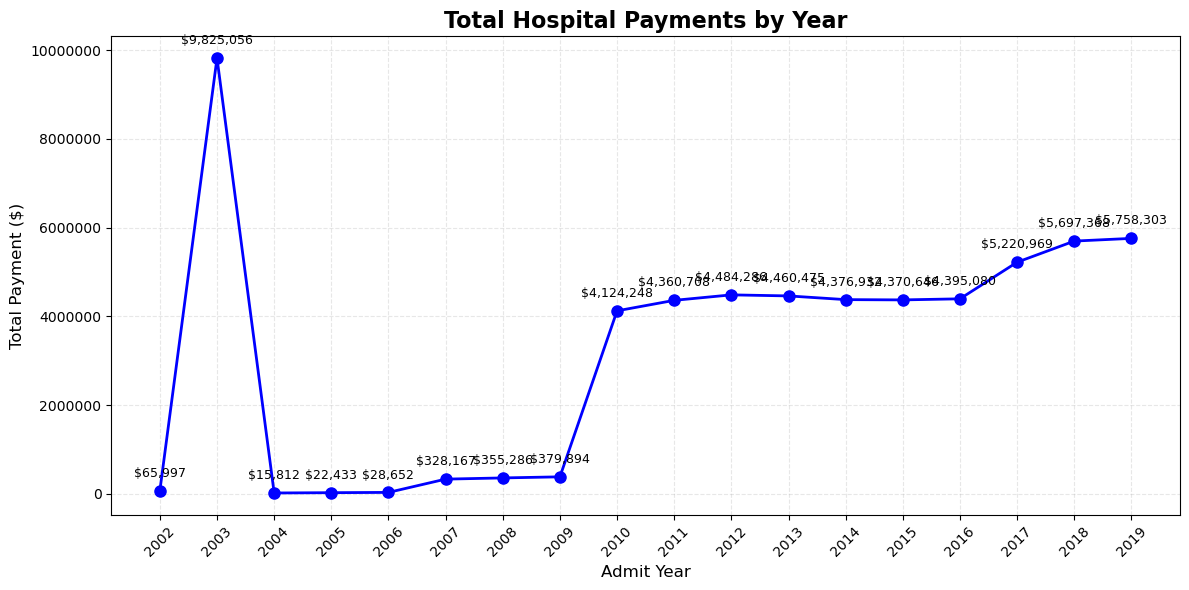

In [56]:
# Create a line graph showing total payments by year
plt.figure(figsize=(12, 6))


#note to self: index should usually be the x value, 
#.values function returns a numpy representation of the dataframe but documentation recommends to use to_numpy
#there is not much of a different between marker='.' and marker='o' except marker is readable
plt.plot(payments_by_year.index, payments_by_year.to_numpy(),
         marker='o', linewidth=2, markersize=8, color='blue')


plt.title('Total Hospital Payments by Year', fontsize=16, fontweight='bold')
plt.xlabel('Admit Year', fontsize=12)
plt.ylabel('Total Payment ($)', fontsize=12)

plt.ticklabel_format(style='plain', axis='y')

plt.grid(True, alpha=0.3, linestyle='--')


plt.xticks(payments_by_year.index, rotation=45)


for year, payment in zip(payments_by_year.index, payments_by_year.values):
    plt.annotate(f'${payment:,.0f}', 
                xy=(year, payment), 
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontsize=9)

plt.tight_layout()
plt.show()


# HAI status & total payment visualizations

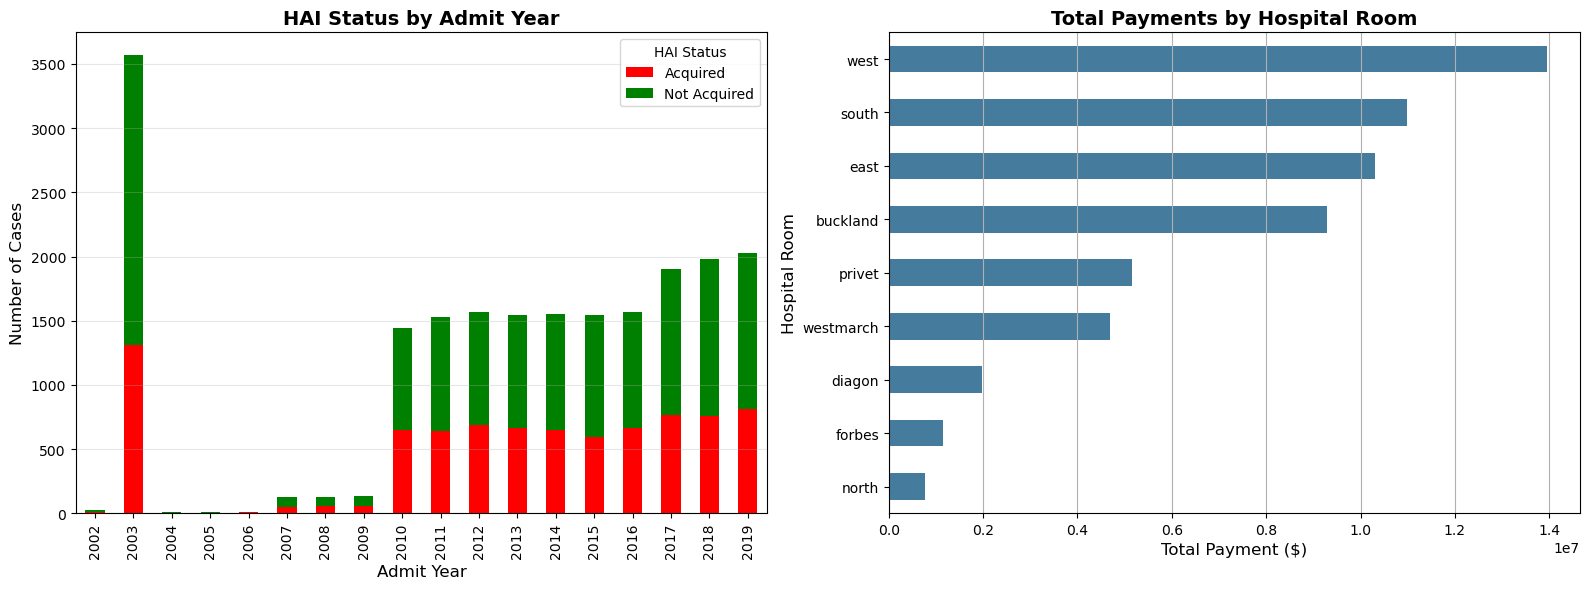

In [57]:
# Create a bar chart comparing HAI status by year
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: HAI Status by Year (Stacked Bar)
hai_by_year.plot(kind='bar', ax=ax1, stacked=True, color=['red', 'green'])
ax1.set_title('HAI Status by Admit Year', fontsize=14, fontweight='bold')
ax1.set_xlabel('Admit Year', fontsize=12)
ax1.set_ylabel('Number of Cases', fontsize=12)
ax1.legend(title='HAI Status')
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Total Payments by Hospital Room
#note to self: vertical bar is the default as kind='bar', defining a horizontal bar is kind='barh'
payments_by_room.sort_values(ascending=True).plot(kind='barh', ax=ax2, color='#457B9D')
ax2.set_title('Total Payments by Hospital Room', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Payment ($)', fontsize=12)
ax2.set_ylabel('Hospital Room', fontsize=12)
ax2.grid(True, alpha=1, axis='x')

plt.tight_layout()
plt.show()

## Summary Statistics Table

Final summary of all key metrics

In [58]:

print(f"Total amount of payments rounded to nearest whole number: $ {hospital_dataframe['payment'].sum().astype(int):,}")
print("Average Payment Amount rounded to nearest whole number: $",hospital_dataframe['payment'].mean().astype(int))
print("Average Readmittance Percentage: ", (hospital_dataframe['readmit'].mean()*100).astype(int)) 

print(f"\nTotal Acquired HAIs: {hospital_dataframe['HAI_Acquired'].sum():,}")
print(f"Total Not Acquired HAIs: {hospital_dataframe['HAI_Not Acquired'].sum():,}")
print(f"HAI Acquisition Rate: {(hospital_dataframe['HAI_Acquired'].sum() / len(hospital_dataframe) * 100):.2f}%")

Total amount of payments rounded to nearest whole number: $ 58,270,312
Average Payment Amount rounded to nearest whole number: $ 2821
Average Readmittance Percentage:  35

Total Acquired HAIs: 8,374
Total Not Acquired HAIs: 12,281
HAI Acquisition Rate: 40.54%
